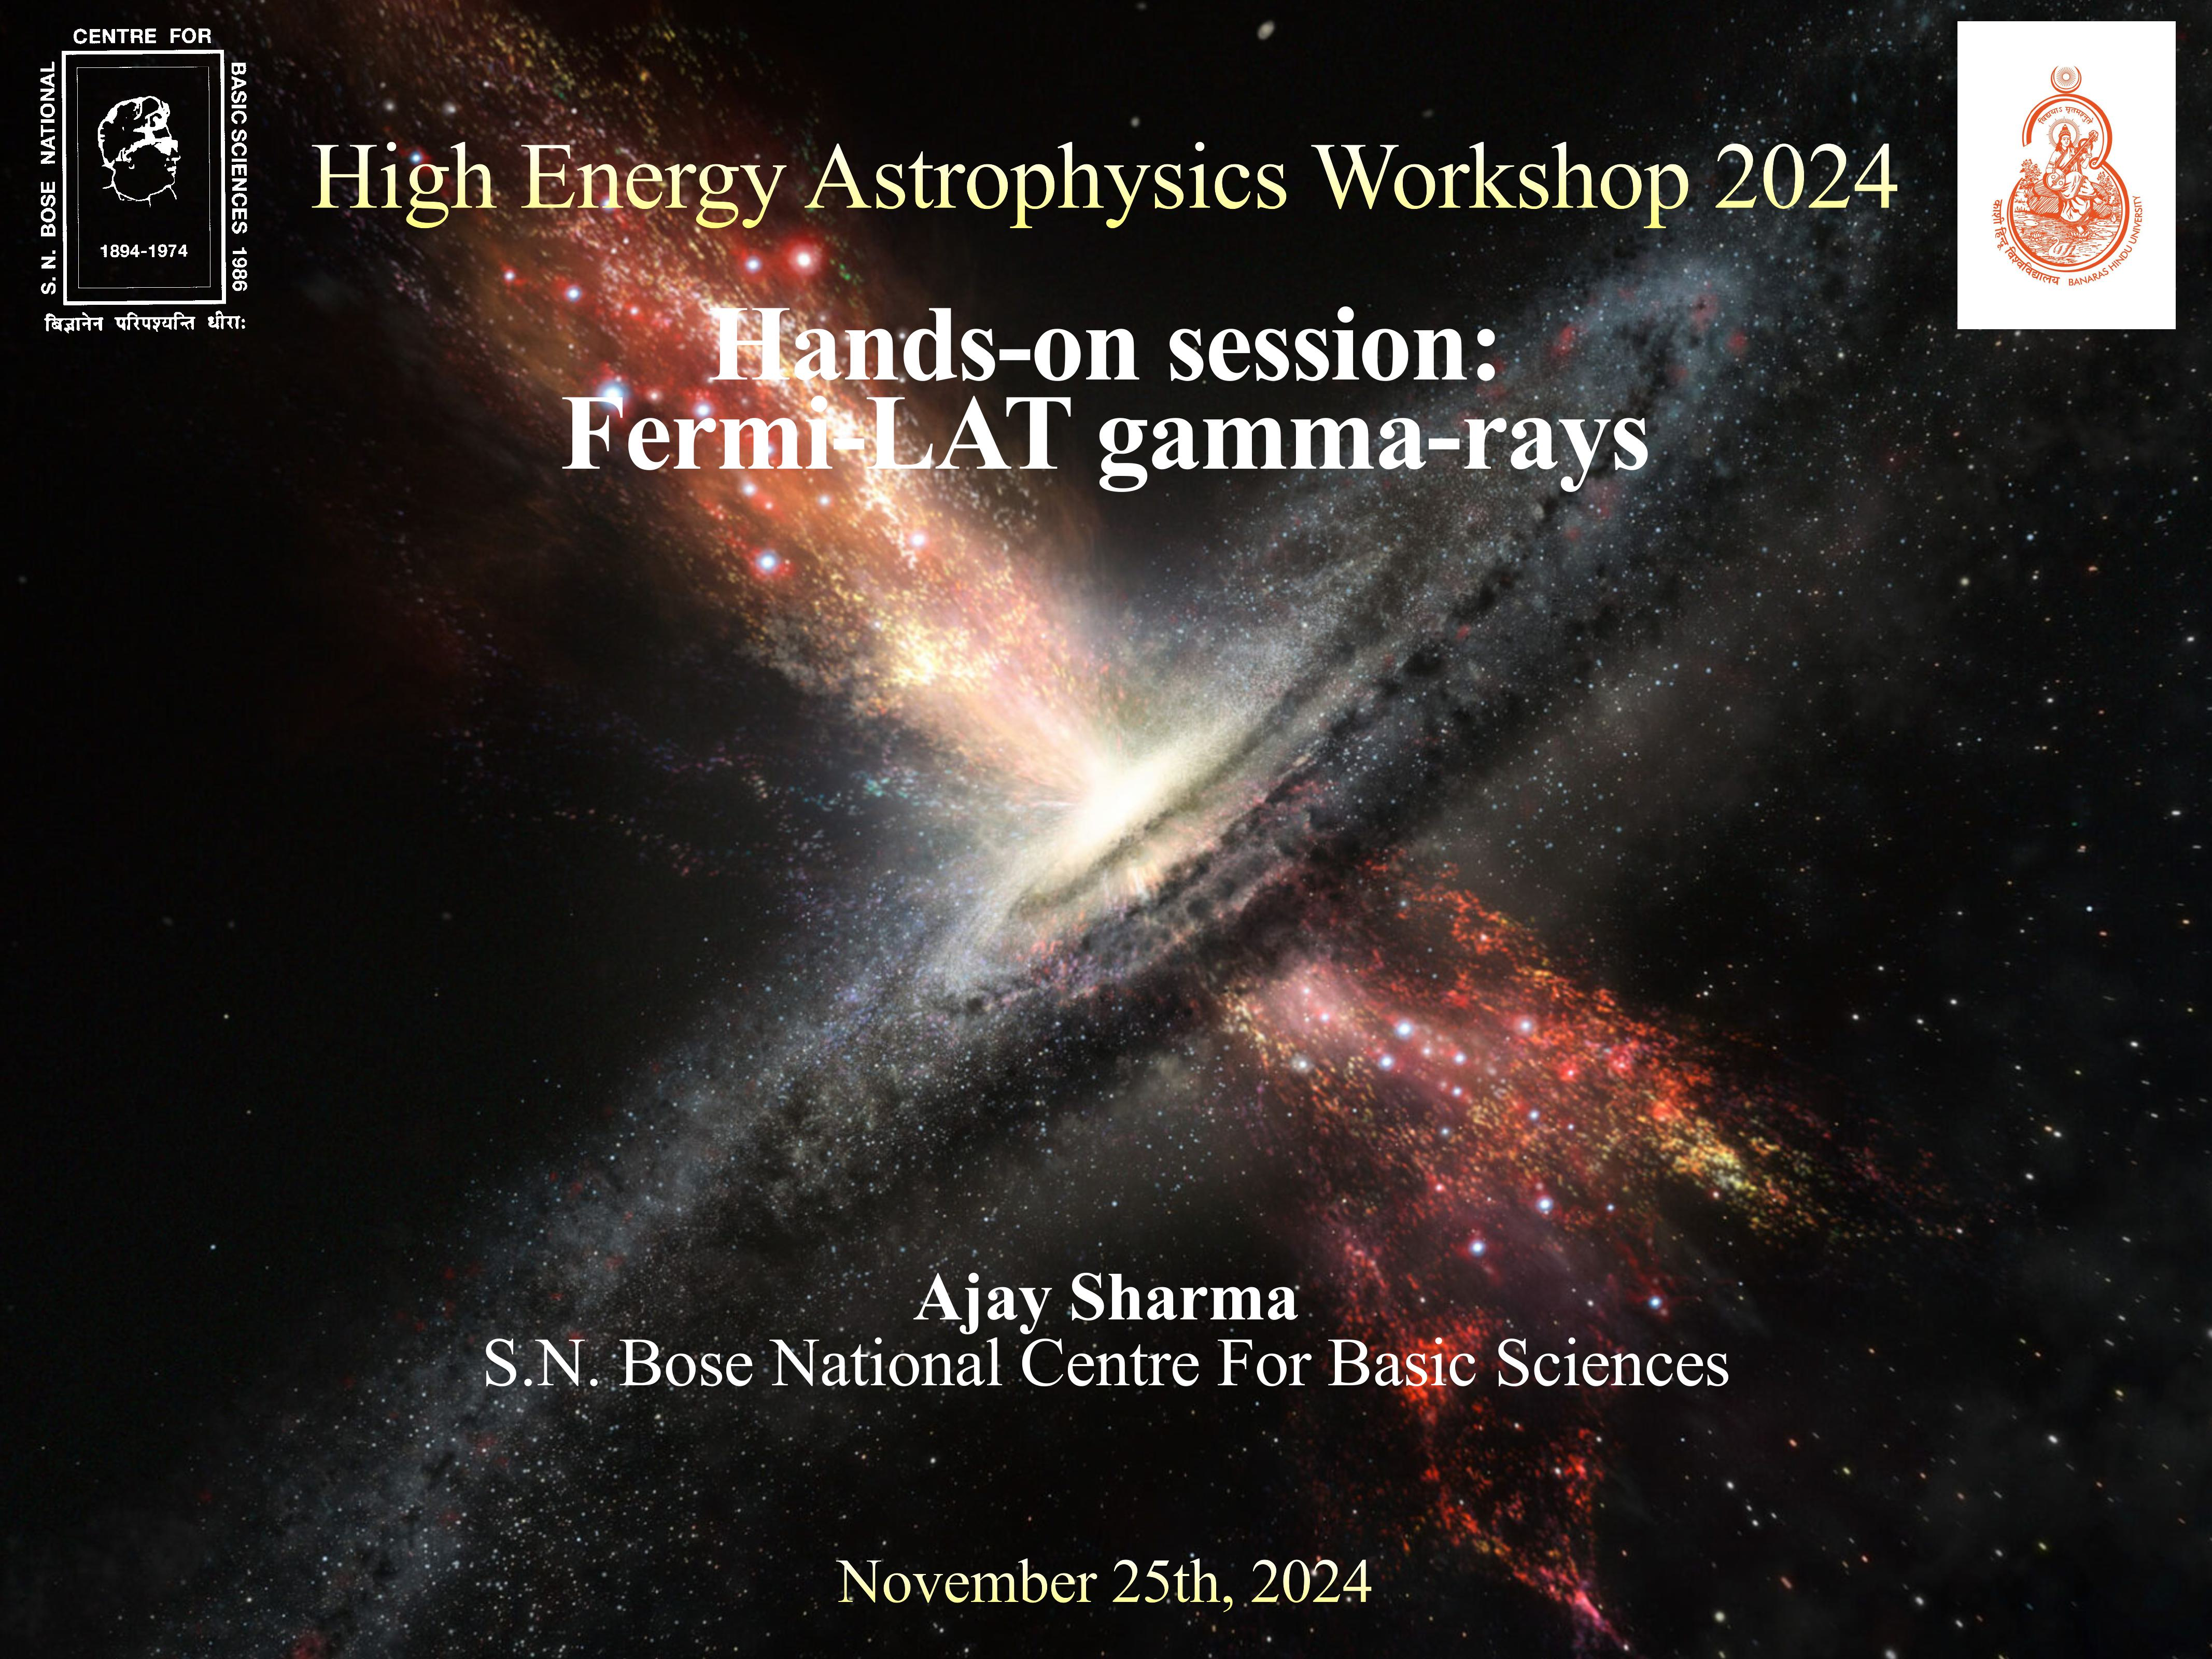

In [1]:
from IPython import display
display.Image('HEAW24_hands-on.jpg',
             width=600, height=200)

# <center> <font color='blue'> # Fermi-LAT data analysis # </font></center>

## Installation of Fermitools and Fermipy
## Activate your environment

# # <font face='Time New Roman'> Fermipy tutorial:</font>


### <font face='Times New Roman' size="4">This tutorial shows how to perform Fermi-LAT analysis with the Fermipy Python package. Many parts of this tutorial are taken directly from the documentation page of Fermipy: [fermipy.readthedocs](https://fermipy.readthedocs.io/en/latest/notebooks/SMC.html). I suggest to visit the documentation page to find further informations.</font>
### <font face='Times New Roman' size="4">Fermipy facilitates analysis of data from the Large Area Telescope (LAT) with the Fermi Science Tools. The Fermipy package is built on the pyLikelihood interface of the Fermi Science Tools and provides a set of high-level tools for performing common analysis tasks:- </font>
- <font face='Time New Roman' size="4"> Data and model preparation with the gt-tools (gtselect, gtmktime, etc.). </font>
- <font face='Time New Roman' size="4"> Extracting a spectral energy distribution (SED) of a source. </font>
- <font face='Time New Roman' size="4"> Generating TS and residual maps for a region of interest </font>
- <font face='Time New Roman' size="4"> Finding new source candidates. </font>
- <font face='Time New Roman' size="4"> Localizing a source or fitting its spatial extension. </font>
- <font face='Time New Roman' size="4"> Perfoming phase analysis </font>
- <font face='Time New Roman' size="4"> Calculating light curves </font>
- <font face='Time New Roman' size="4"> Deriving the sensitivity of gamma-ray sources with a specific SED and spatial morphology. </font>


# # <font face='Time New Roman'> Fermi-LAT data of blazar PG 1553+113</font>

### <font face='Time New Roman'> Take a quick look at the source on [Fermi-LAT lightcurve repository](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/LightCurveRepository/) : </font>

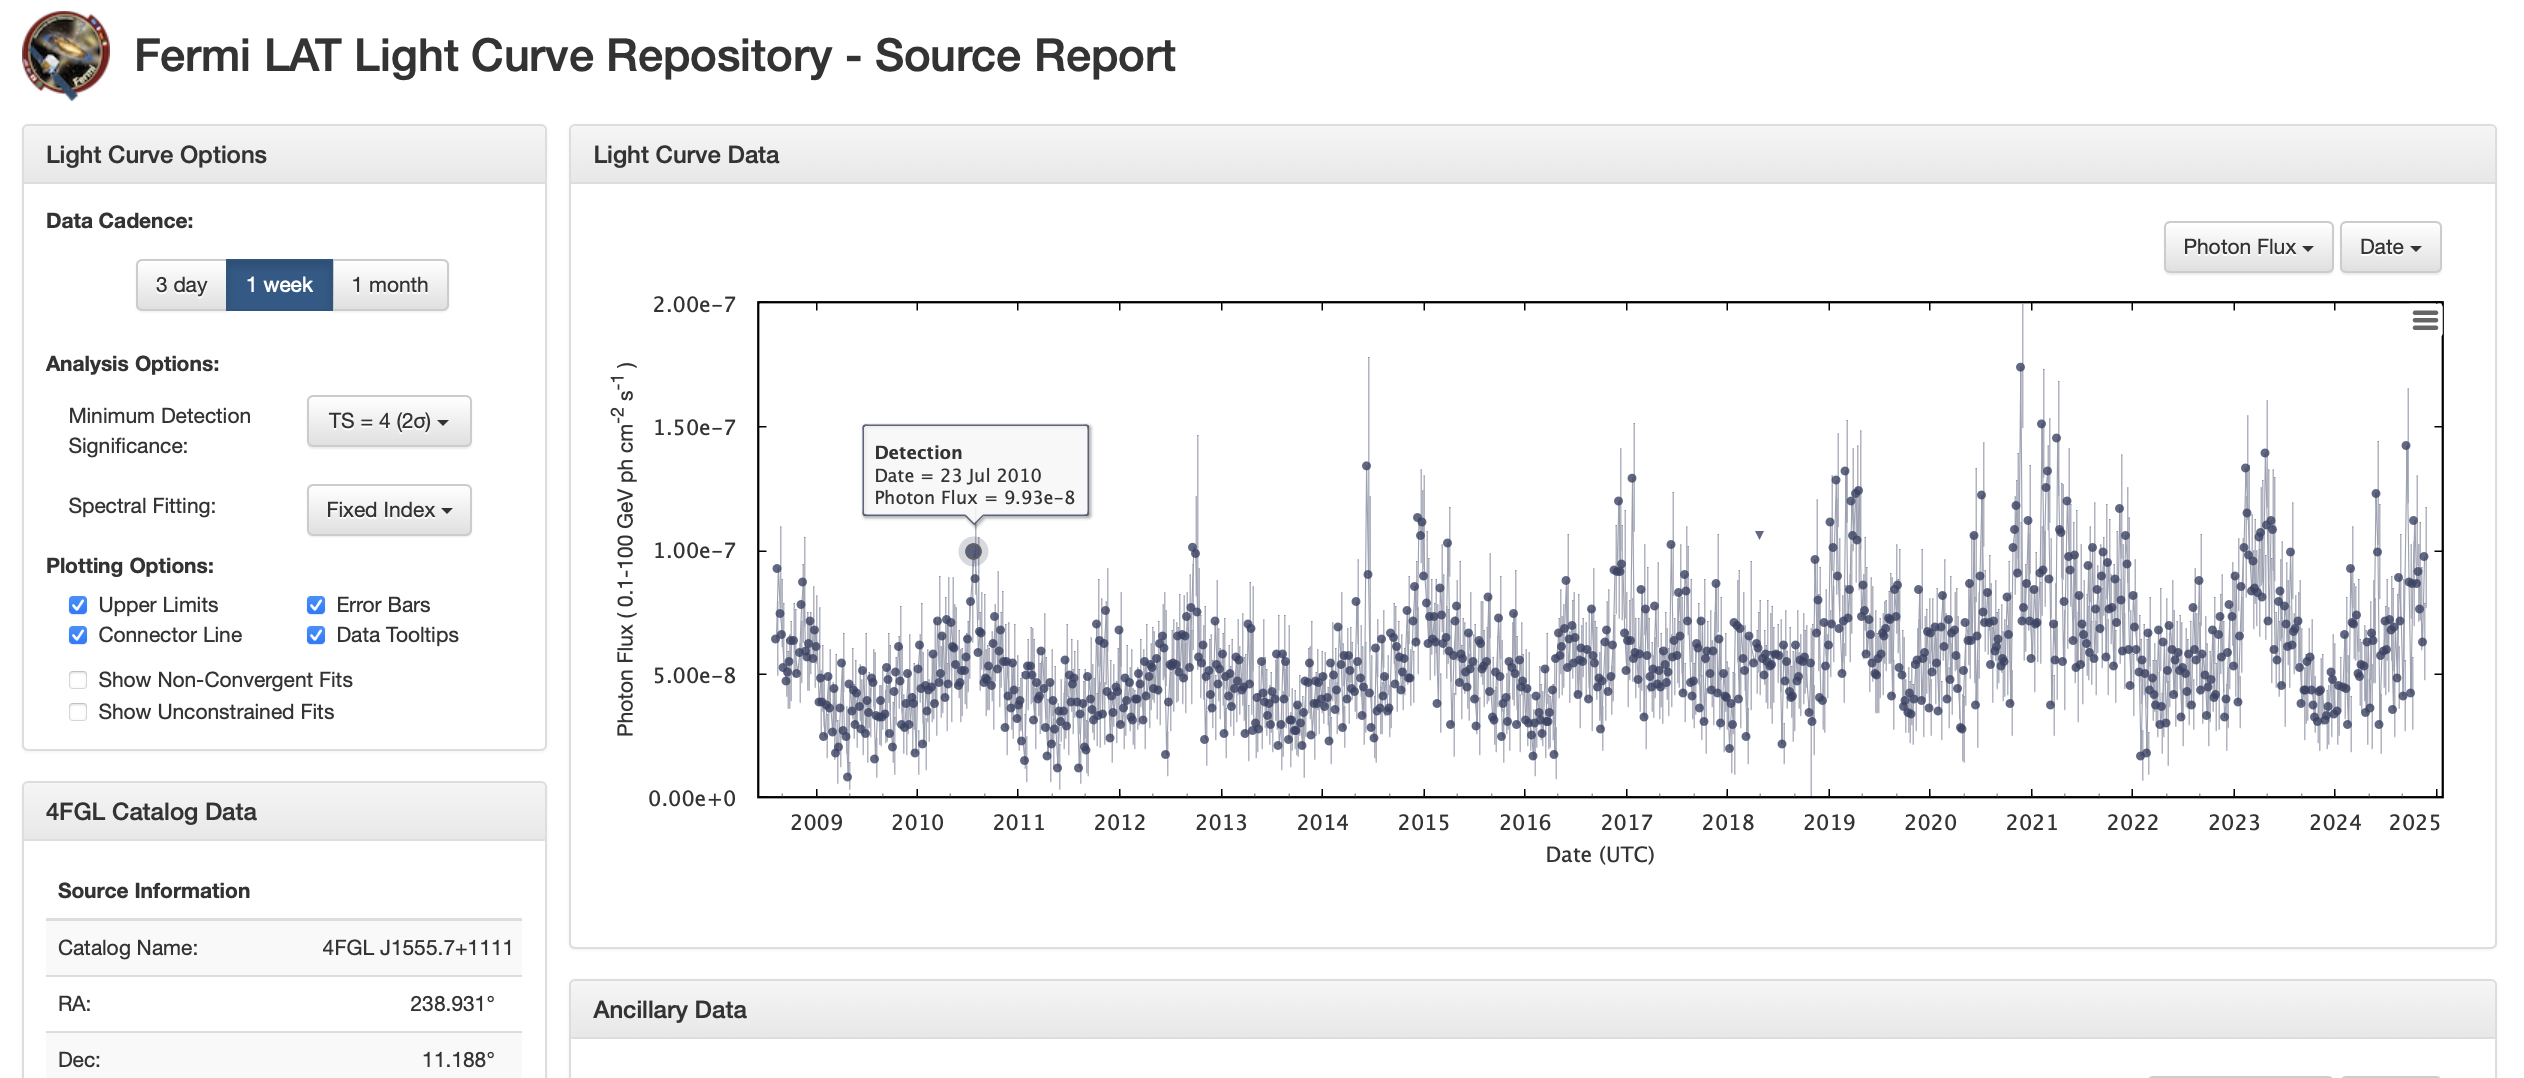

In [41]:
from IPython import display
display.Image('Fermi_lc_repo.png',
             width=1100, height=300)

### <font face='Time New Roman'> The original data were taken from the official [Fermi-LAT data server](https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi) with the following input entities: </font>
- <font face='Time New Roman' size="4"> Search Center (RA,Dec) = (238.929,11.1901) </font>
- <font face='Time New Roman' size="4"> Radius = 15 degrees </font>
- <font face='Time New Roman' size="4"> Start Time (MET) = 725760005 seconds (2024-01-01T00:00:00) </font>
- <font face='Time New Roman' size="4"> Stop Time (MET) = 752112005 seconds (2024-011-01T00:00:00) </font>
- <font face='Time New Roman' size="4"> Minimum Energy = 100 MeV </font>
- <font face='Time New Roman' size="4"> Maximum Energy = 300000 MeV </font>
### <font color='red' face='Time New Roman'> You do not need to download anything following this procedure now. Because all the necessary file are already available on the [Github link](https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi). A suggestion is to keep all the files in a folder.</font>

### <font face='Time New Roman' size="4"> In your folder, you will notice multiple files with the extension _PH.fits. These are the event photon files for your source. To proceed, you need to create a file list containing the names of these input event files.</font>

### <font face='Time New Roman' size="4"> You can create this list manually using a text editor or by following these steps:</font>

- <font face='Time New Roman' size="4"> Open a terminal in the directory where all the photon files are stored. Run the following command to generate the file list:</font> <font color='blue'> ls *_PH*.fits > event.lst </font>
- <font face='Time New Roman' size="4"> Alternatively, you can execute the same command directly in a Jupyter Notebook:</font> <font color='blue'> !ls *_PH*.fits > event.lst </font>

### <font face='Time New Roman' size="4"> Before proceeding, ensure the event.lst file has been successfully created in the directory. </font>

# # <font face='Time New Roman'> Make a config file </font>


### <font face='Times New Roman' size="4">fermipy bases its analysis on a configuration file (in [yaml](https://yaml.org) format). We’re just going to use a really simple config file for a standard analysis. There are many many more options which you can use or you can modify these options after the fact within the analysis chain. </font>

### <font face='Times New Roman' size="4">Make a config file named ‘config.yaml’ like the following. For more details on the config file see [config.html](https://fermipy.readthedocs.io/en/latest/config.html). You will probably need to customize this a bit since your files might not be in the same place or named the same. The galactic and isotropic diffuse will need to be located on your system (they are included in the science tools or can be downloaded from the FSSC). In the following example we set the path to these files with the environment variable FERMI_DIFFUSE_DIR. If FERMI_DIFFUSE_DIR is not defined fermipy will look for the location of these files within the FSSC STs distribution.</font>

# <span style="font-family: 'Times New Roman'; font-size: 20px; line-height: 0.8 ">
    data:
       evfile : 
       scfile :

    binning:
       roiwidth   : 10.0
       binsz      : 0.1
       binsperdec : 8

    selection :
       emin : 100
       emax : 300000
       zmax    : 90
       evclass : 128
       evtype  : 3
       tmin    : 725760005
       tmax    : 752112005
       filter  : 'DATA_QUAL>0 && LAT_CONFIG==1'
       target : '4FGL J1555.7+1111'

    gtlike:
       edisp : True
       irfs : 'P8R3_SOURCE_V3'
       edisp_disable : ['isodiff','galdiff']

    model:
      src_roiwidth : 15.0
      galdiff  : '$FERMI_DIFFUSE_DIR/gll_iem_v07.fits'
  isodiff  : '$FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt'
      catalogs : '4FGL'
            
# </span>


# # <font face='Time New Roman'> Let's start the analysis </font>

### <font face='Times New Roman' size="4"> Now, you need to create an analysis script and run the setup steps which include running the selections and generating exposure maps etc. fermipy will load the point source model, create your xml file for you, decide on all the appropriate cuts and binnings and just go. All of this is configurable from python or from the config file. And, if you need to rerun things, it’s smart enough to not overwrite files if it doesn’t need to. This will take a bit.</font>

# # <font face='Time New Roman'> Initialise some useful python modules </font>

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
matplotlib.interactive(True)

# # <font face='Time New Roman'> Import the GTAnalysis module from fermipy </font>

### <font face='Times New Roman' size="4"> You start by importing the module and then creating an instance of the analysis object from our config file. When instantiating the analysis object we can override any options defined in the configuration file by passing keyword arguments to the object constructor. Here we explicitly set the verbosity parameter to 3 (INFO) which supresses DEBUG output. When we create the object, it spits out a bunch of information about all of the parameters that were used. You can see there are many more options than the ones we chose.</font>

In [25]:
from fermipy.gtanalysis import GTAnalysis

In [26]:
gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})

2024-11-21 01:54:57 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.3.1 
ScienceTools version 2.2.0


### <font face='Times New Roman' size="4"> This gets everything ready for the likelihood analysis including instantiating the pylikelihood object. Note that fermipy will skip generating any ancillary files that already exist in the working directory. In the sample tarball these files have already been produced in order to speed up this stage of the analysis. If you want to see the behavior of fermipy when running from an empty working directory you can delete one or more of these files before running setup.</font>

In [27]:
gta.setup()

2024-11-21 01:55:02 INFO    GTAnalysis.setup(): Running setup.
2024-11-21 01:55:02 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-11-21 01:55:02 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-11-21 01:55:02 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2024-11-21 01:55:03 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 60310.000000 from DATE-OBS.
Set MJD-END to 60614.993543 from DATE-END'. [astropy.wcs.wcs]
2024-11-21 01:55:04 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2024-11-21 01:55:04 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2024-11-21 01:55:04 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-11-21 01:55:19 INFO    GTAnalysis.setup(): Initializing source properties
2024-11-21 01:55:25 INFO    GTAnalysis.setup(): Finished setup.


### <font face='Times New Roman' size="4" color='red'> NOTE:-</font> <font face='Times New Roman' size="4"> In the output of this setup task, several steps have been skipped as the preprocessed files have already been provided. This allows you to complete the analysis within the allocated time frame for this activity. </font> 

### <font face='Times New Roman' size="4"> Just take a quick look at all the preprocessed files before proceeding with the analysis </font> 

In [28]:
ls *fits

4fgl_j1555.7+1111_lightcurve.fits* bexpmap_roi_00.fits*
4fgl_j1555.7+1111_sed.fits*        ccube.fits*
L241119081901FD19599832_PH00.fits* ccube_00.fits*
L241119081901FD19599832_PH01.fits* fit0.fits*
L241119081901FD19599832_PH02.fits* ft1_00.fits*
L241119081901FD19599832_SC00.fits* ltcube_00.fits*
bexpmap_00.fits*                   srcmap_00.fits*


### <font face='Time New Roman'> Here is a brief explanation of the contents of each file and its role in the analysis: </font>
- <font face='Time New Roman' size="4" color='green'> ft1_00.fits:</font> <font face='Time New Roman' size="4"> Event list. This is generated by running gtselect and gtmktime on our input file list. </font>
- <font face='Time New Roman' size="4" color='green'> bexpmap_00.fits:</font> <font face='Time New Roman' size="4"> All-sky binned exposure map. This map is interpolated to create an exposure model when generating the srcmap file. </font>
- <font face='Time New Roman' size="4" color='green'> bexpmap_roi_00.fits:</font> <font face='Time New Roman' size="4"> Binned exposure map for the ROI. This file is only provided for visualization purposes in order to have an exposure map with the same binning as the data and model maps. </font>
- <font face='Time New Roman' size="4" color='green'> ccube_00.fits:</font> <font face='Time New Roman' size="4"> Counts cube for the ROI. </font>
- <font face='Time New Roman' size="4" color='green'> ltcube_00.fits:</font> <font face='Time New Roman' size="4"> Livetime cube. This contains a map of the livetime for this observation over the whole sky as a function of incidence angle. </font>
- <font face='Time New Roman' size="4" color='green'> srcmap_00.fits:</font> <font face='Time New Roman' size="4"> Source map cube. This file contains maps for each of the components in the ROI after convolution with exposure and the PSF. Note that energy dispersion is applied at run-time. </font>
### <font face='Time New Roman' size="4"> Note that all of the files have a numerical suffix ‘00’. This is the analysis component index. In a multi-component analysis there would be instances of all of the above files for each analysis component. The files with no component index are co-added maps that are provided for visualization purposes.</font>

# #<font face='Time New Roman'> Take a quick look at Count cube file </font>

Filename: ccube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (100, 100, 28)   float32   
  1  EBOUNDS       1 BinTableHDU     22   28R x 4C   [K, D, D, D]   


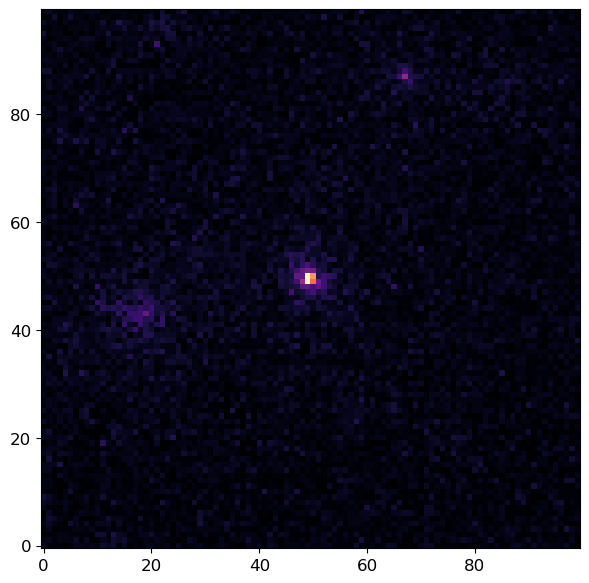

In [33]:
import astropy.io.fits as pyfits
h = pyfits.open('ccube.fits')
h.info()
counts = h[0].data
counts.shape

plt.figure(figsize=(7,7),dpi=100)
plt.imshow(np.sum(counts,axis=0), interpolation='nearest', cmap='magma', origin = 'lower')

# <font face='Time New Roman' size=4> We can now inspect the state of the ROI prior with the print_roi() method.</font>

In [34]:
gta.print_roi()

2024-11-21 01:56:13 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1555.7+1111   PointSource    LogParabola       0.000       nan      1054.3
4FGL J1553.6+1257   PointSource    LogParabola       1.838       nan       464.3
4FGL J1603.8+1104   PointSource    PowerLaw          1.994       nan        59.4
4FGL J1552.0+0850   PointSource    PowerLaw          2.516       nan        58.7
4FGL J1608.7+1029   PointSource    LogParabola       3.262       nan       392.7
4FGL J1606.6+1324   PointSource    PowerLaw          3.473       nan        70.2
4FGL J1546.0+0819   PointSource    PowerLaw          3.726       nan        80.8
4FGL J1548.3+1456   PointSource    LogParabola       4.160       nan       204.5
4FGL J1539.1+1008   PointSource    PowerLaw          4.201       nan        58.0
4FGL J1541.7+1413   PointSource    PowerLaw          4.5

# <font face='Time New Roman' size=4> Additional details about an individual source can be retrieved by printing the corresponding source object. Here we use the bracket operator to return the properties of PG1553+113 (4FGL J1555.7+1111).</font>

In [35]:
print(gta.roi['4FGL J1555.7+1111'])

Name           : 4FGL J1555.7+1111
Associations   : ['4FGL J1555.7+1111', 'PG 1553+113']
RA/DEC         :    238.931/    11.188
GLON/GLAT      :     21.908/    43.962
TS             : nan
Npred          : 1054.30
Flux           : 4.546e-08 +/-      nan
EnergyFlux     : 0.0001302 +/-      nan
SpatialModel   : PointSource
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  3.602e-12 +/-        nan
b'alpha'       :      1.536 +/-        nan
b'beta'        :    0.07047 +/-        nan
b'Eb'          :       1847 +/-        nan


# #<font face='Time New Roman'> Do the likelihood fitting </font>

# <font face='Time New Roman' size=4> Now that all of the ancillary files have been generated, we can move on to the actual fitting. The first thing you should do is free some of the sources since all of the sources are initially fixed. We’ll just free those sources in the center region.</font>

# <font face='Time New Roman' size=4> Logparabola model</font>
# <center> $\frac{dN}{dE}=N_0 \left( \frac{E}{E_b} \right)^{-(\alpha + \beta ln(E/E_b))}$
# <font face='Time New Roman' size=4> where:</font>
- <font face='Time New Roman' size=4> norm = $N_0$</font>
- <font face='Time New Roman' size=4> alpha = $\alpha$</font>
- <font face='Time New Roman' size=4> beta = $\beta$</font>
- <font face='Time New Roman' size=4> Eb = $E_b$</font>


In [36]:
# First fix all the sources
gta.free_sources(False)

# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance = 5.0, pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
gta.free_source('isodiff')

2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1555.7+1111     : ['norm']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1553.6+1257     : ['norm']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1603.8+1104     : ['Prefactor']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1552.0+0850     : ['Prefactor']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1608.7+1029     : ['norm']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1606.6+1324     : ['Prefactor']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1546.0+0819     : ['Prefactor']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1548.3+1456     : ['norm']
2024-11-21 01:56:18 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1539.1+1008     :

# <font face='Time New Roman' size=4> In this simple anlaysis we are leaving the spectral shapes of sources fixed but we’re going to free the spectral shape of the source we are working on.</font>

In [37]:
gta.free_source('4FGL J1555.7+1111')

2024-11-21 01:56:21 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1555.7+1111     : ['alpha', 'beta']


# <font face='Time New Roman' size=4> Now, actually do the fit. The software does its best to get the fit to converge by running the fit several times.</font>

In [38]:
fit_results = gta.fit()

2024-11-21 01:56:22 INFO    GTAnalysis.fit(): Starting fit.
2024-11-21 01:56:29 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-11-21 01:56:29 INFO    GTAnalysis.fit(): LogLike:   -56578.213 DeltaLogLike:      486.958 


# <font face='Time New Roman' size=4> The dictionary returned by the fit method returns a variety of diagnostic information about the fit including the fit quality, the relative improvement in the likelihood, and the correlations among the fit parameters. We can inspect the results of the fit by printing the source object for PG1553+113.</font>

In [39]:
print('Fit_Quality: ', fit_results['fit_quality'])
print(gta.roi['4FGL J1555.7+1111'])

Fit_Quality:  3
Name           : 4FGL J1555.7+1111
Associations   : ['4FGL J1555.7+1111', 'PG 1553+113']
RA/DEC         :    238.931/    11.188
GLON/GLAT      :     21.908/    43.962
TS             : 3730.54
Npred          : 1641.98
Flux           : 7.591e-08 +/- 5.89e-09
EnergyFlux     : 0.0001591 +/-  1.4e-05
SpatialModel   : PointSource
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  5.054e-12 +/-  2.228e-13
b'alpha'       :      1.647 +/-    0.03375
b'beta'        :     0.0585 +/-    0.01553
b'Eb'          :       1847 +/-        nan


# <font face='Time New Roman' size=4> After the fitting, test statistic (TS) value of each source within the ROI is given below </font> 

In [40]:
gta.print_roi()

2024-11-21 01:56:29 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1555.7+1111   PointSource    LogParabola       0.000   3730.54      1642.0
4FGL J1553.6+1257   PointSource    LogParabola       1.838     25.00       202.8
4FGL J1603.8+1104   PointSource    PowerLaw          1.994      7.66        73.5
4FGL J1552.0+0850   PointSource    PowerLaw          2.516     65.93       188.5
4FGL J1608.7+1029   PointSource    LogParabola       3.262   1193.24      2033.1
4FGL J1606.6+1324   PointSource    PowerLaw          3.473      1.40        41.2
4FGL J1546.0+0819   PointSource    PowerLaw          3.726     32.15        88.5
4FGL J1548.3+1456   PointSource    LogParabola       4.160    687.56       612.4
4FGL J1539.1+1008   PointSource    PowerLaw          4.201     13.20       142.5
4FGL J1541.7+1413   PointSource    PowerLaw          4.5

# <font face='Time New Roman' size=4>You can then save the state of the roi to an output file for reference later. The write_roi function does this. The first argument is a string that will be prepended to the names of the output files generated by this method.</font>

In [41]:
gta.write_roi('fit0', make_plots=True)

2024-11-21 01:56:33 INFO    GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/fit0_00.xml...
2024-11-21 01:56:33 INFO    GTAnalysis.write_fits(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/fit0.fits...
2024-11-21 01:56:45 INFO    GTAnalysis.write_roi(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/fit0.npy...


# <font face='Time New Roman' size=4> There are a lot of diagnostic plots also saved at the same time.</font>

In [42]:
ls -l *.png

-rwx------@ 1 ajaysharma  staff  112865 Nov 21 01:56 fit0_counts_map_2.000_5.477.png*
-rwx------@ 1 ajaysharma  staff   40796 Nov 21 01:56 fit0_counts_map_xproj_2.000_5.477.png*
-rwx------@ 1 ajaysharma  staff   37588 Nov 21 01:56 fit0_counts_map_yproj_2.000_5.477.png*
-rwx------@ 1 ajaysharma  staff   95674 Nov 21 01:56 fit0_counts_spectrum.png*
-rwx------@ 1 ajaysharma  staff   98035 Nov 21 01:56 fit0_model_map_2.000_5.477.png*


In [43]:
from IPython.display import Image, display
from glob import glob

In [44]:
pngs = glob('*.png')

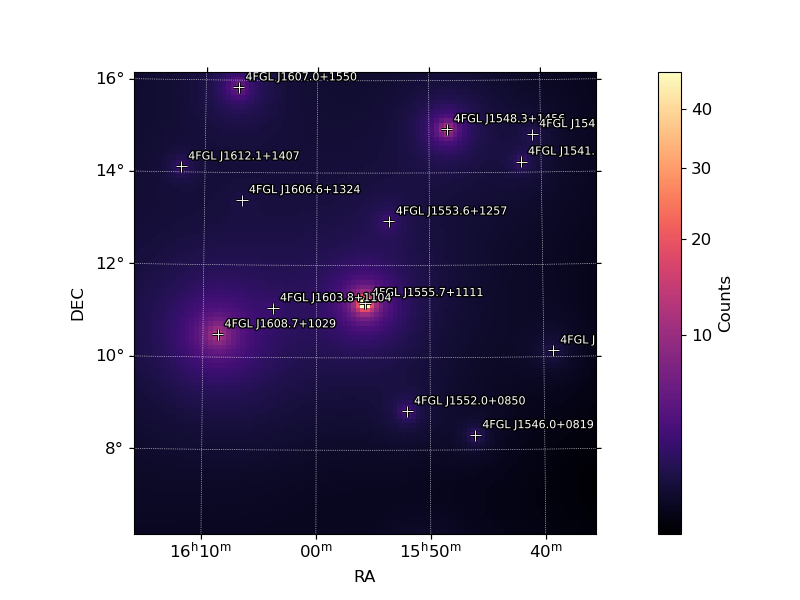

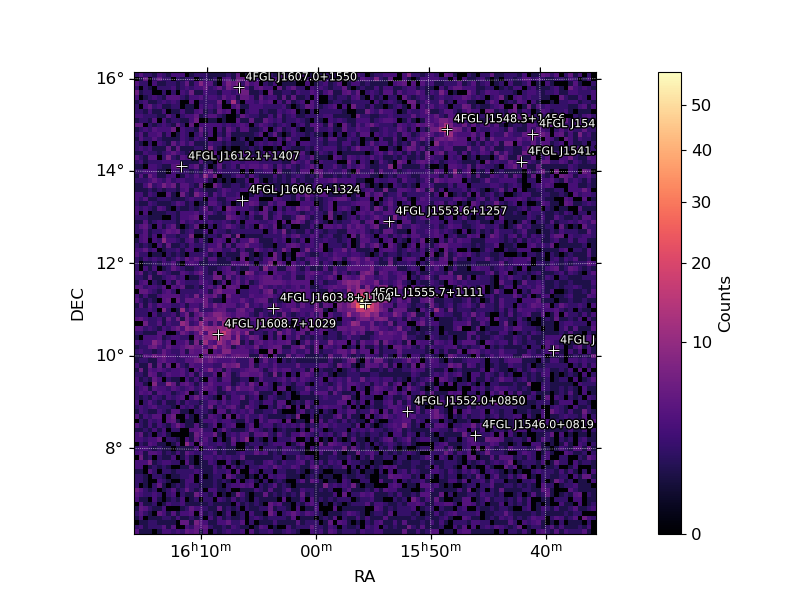

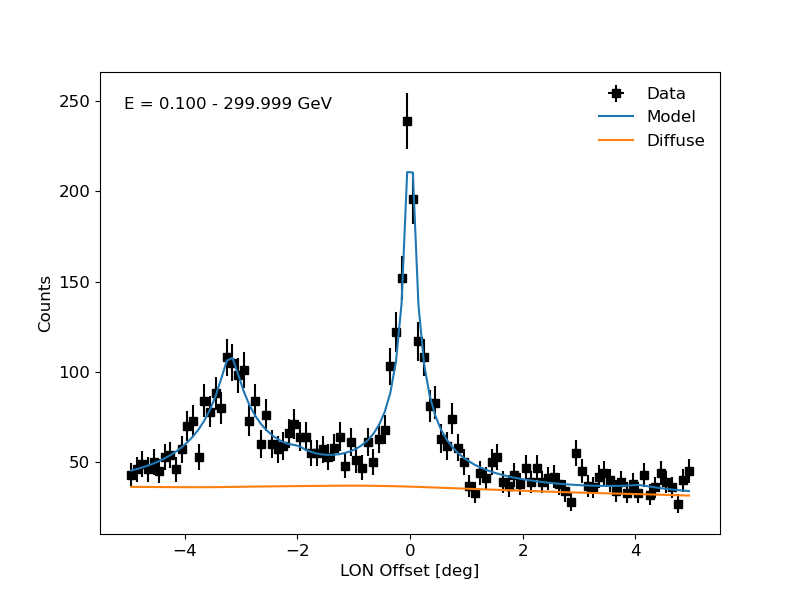

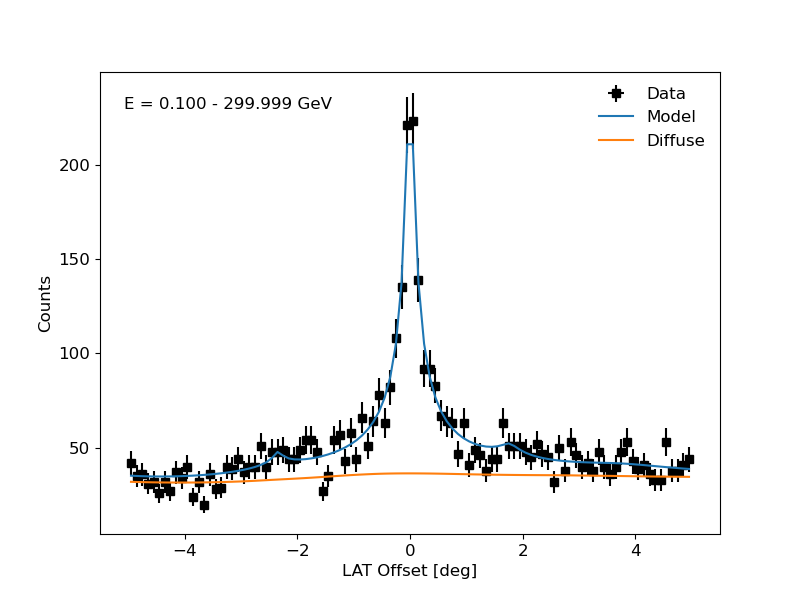

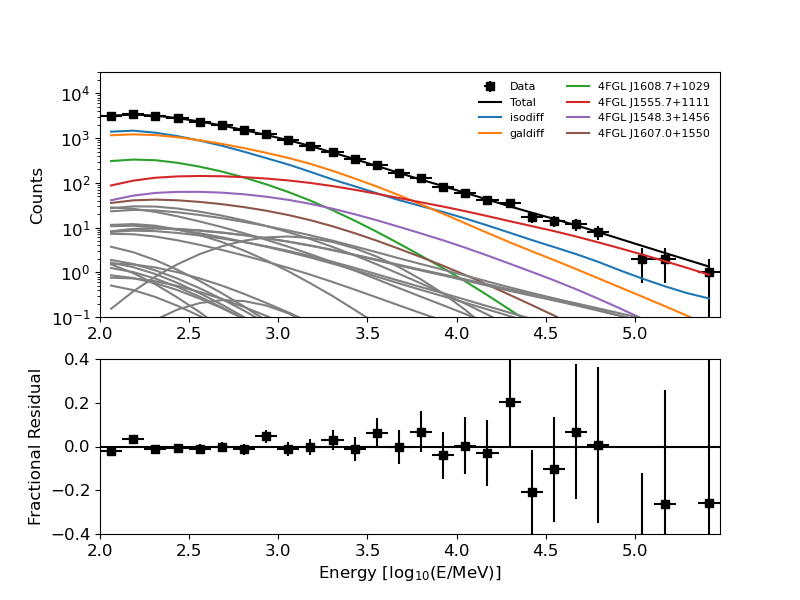

In [45]:
for png in pngs:
    my_img = Image(png)
    display(my_img)

# #<font face='Time New Roman'> Reading in the results </font>

# <font face='Time New Roman' size=4> Since the results are saved, you can load them back up at any point (you can also get to these within python). Here we retrieve the analysis results from the output numpy file.</font>

In [15]:
res = np.load('fit0.npy', allow_pickle=True).flat[0]
res['sources'].keys()

dict_keys(['4FGL J1555.7+1111', '4FGL J1553.6+1257', '4FGL J1603.8+1104', '4FGL J1552.0+0850', '4FGL J1608.7+1029', '4FGL J1606.6+1324', '4FGL J1546.0+0819', '4FGL J1548.3+1456', '4FGL J1539.1+1008', '4FGL J1541.7+1413', '4FGL J1612.1+1407', '4FGL J1540.7+1449', '4FGL J1607.0+1550', '4FGL J1550.7+0528', '4FGL J1549.6+1710', '4FGL J1527.8+1013', '4FGL J1543.6+0452', '4FGL J1623.4+0858', '4FGL J1546.5+1816', '4FGL J1542.3+1801', '4FGL J1538.9+0425', '4FGL J1612.4+0409', '4FGL J1531.6+0406', '4FGL J1626.4+1820', 'isodiff', 'galdiff'])

# <font face='Time New Roman' size=4> Let’s take a look at the flux, spectral parameters, and TS </font>

In [16]:
res['sources']['4FGL J1555.7+1111']['flux']

7.590689203382017e-08

In [17]:
print(res['sources']['4FGL J1555.7+1111']['param_names'][:4])
print(res['sources']['4FGL J1555.7+1111']['param_values'][:4])

[b'norm' b'alpha' b'beta' b'Eb']
[5.05386152e-12 1.64693269e+00 5.84964293e-02 1.84673450e+03]


In [18]:
res['sources']['4FGL J1555.7+1111']['ts']

3730.5355205028027

# <center> Spectral Energy Distribution (SED) </center>

# <font face='Time New Roman' size=4> The SED is in there as well. We can plot it. </font>

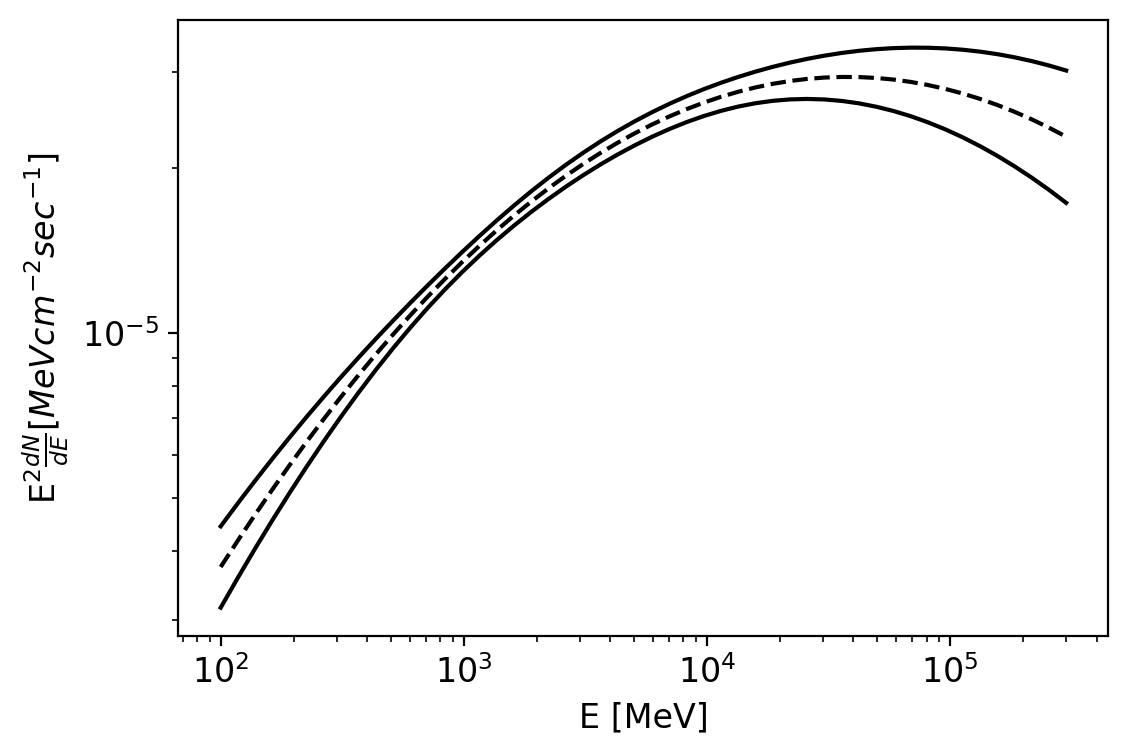

In [56]:
E = np.array(res['sources']['4FGL J1555.7+1111']['model_flux']['energies'])
dnde = np.array(res['sources']['4FGL J1555.7+1111']['model_flux']['dnde'])
dnde_hi = np.array(res['sources']['4FGL J1555.7+1111']['model_flux']['dnde_hi'])
dnde_lo = np.array(res['sources']['4FGL J1555.7+1111']['model_flux']['dnde_lo'])

plt.figure(figsize=(6,4),dpi=200)
plt.plot(E,(E**2)*dnde, 'k--')
plt.plot(E,(E**2)*dnde_hi, 'k')
plt.plot(E,(E**2)*dnde_lo, 'k')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2 \frac{dN}{dE} [MeV cm^{-2} sec^{-1}]$')
plt.show()                   

# <font face='Time New Roman' size=4> If you want SED points, there’s a function for that. There are lots of options for this which you can set in the config file or from keyword arguments of the function itself.</font>

In [57]:
sed = gta.sed('4FGL J1555.7+1111')

2024-11-21 10:23:59 INFO    GTAnalysis.sed(): Computing SED for 4FGL J1555.7+1111
2024-11-21 10:24:01 INFO    GTAnalysis._make_sed(): Fitting SED
2024-11-21 10:24:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1555.7+1111     : ['alpha', 'beta']
2024-11-21 10:24:01 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
2024-11-21 10:24:24 INFO    GTAnalysis.sed(): Finished SED
2024-11-21 10:24:31 INFO    GTAnalysis.sed(): Execution time: 32.48 s


# <font face='Time New Roman' size=4> You can save the state to the yaml file or you can just access it directly. This is also the way to get at the dictionary for any individual source.</font>

In [58]:
src = gta.roi['4FGL J1555.7+1111']
print(src)

Name           : 4FGL J1555.7+1111
Associations   : ['4FGL J1555.7+1111', 'PG 1553+113']
RA/DEC         :    238.931/    11.188
GLON/GLAT      :     21.908/    43.962
TS             : 3730.54
Npred          : 1641.98
Flux           : 7.591e-08 +/- 5.89e-09
EnergyFlux     : 0.0001591 +/-  1.4e-05
SpatialModel   : PointSource
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  5.054e-12 +/-  2.228e-13
b'alpha'       :      1.647 +/-    0.03375
b'beta'        :     0.0585 +/-    0.01553
b'Eb'          :       1847 +/-        nan


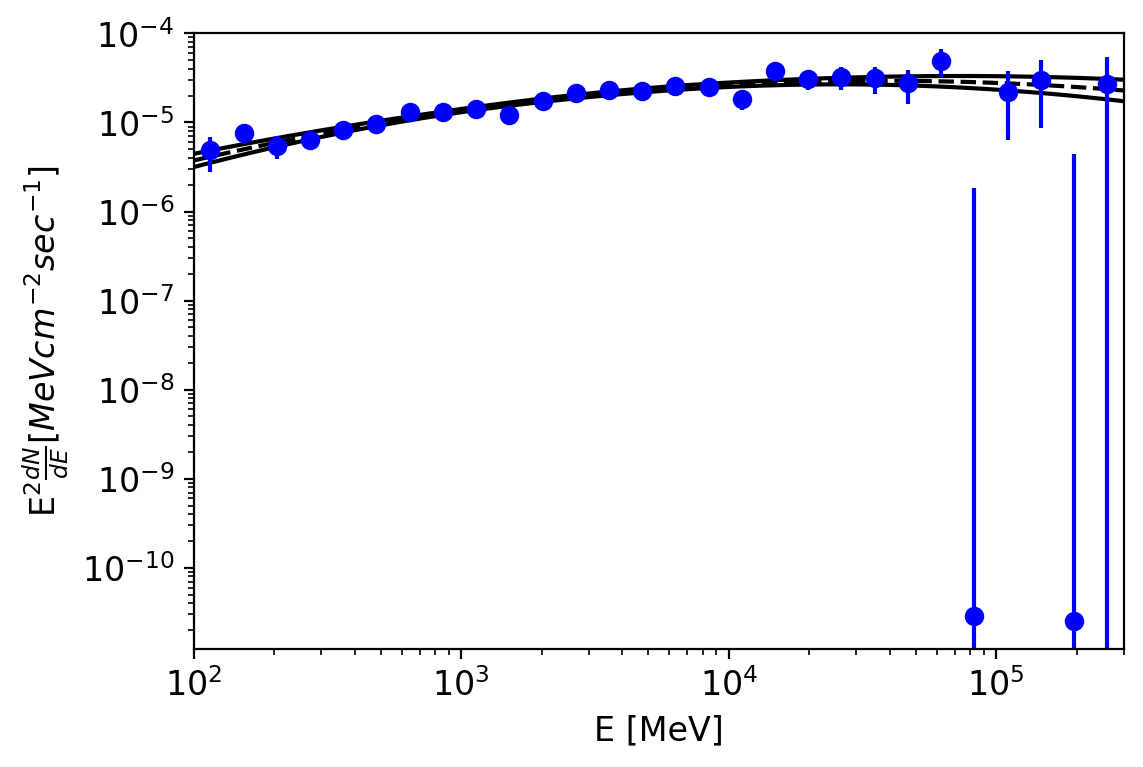

In [63]:
plt.figure(figsize=(6,4),dpi=200)
plt.plot(E,(E**2)*dnde, 'k--')
plt.plot(E,(E**2)*dnde_hi, 'k')
plt.plot(E,(E**2)*dnde_lo, 'k')
plt.yscale('log')
plt.xscale('log')
plt.errorbar(np.array(sed['e_ctr']),np.array(sed['e2dnde']),yerr = np.array(sed['e2dnde_err']),fmt = 'o', color='blue')
plt.xlim(100,300000)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2 \ \frac{dN}{dE} \ [MeV \ cm^{-2} \ sec^{-1}]$')
plt.show()

# <font face='Time New Roman' size=4>  Looks like, last few points should be upper limits. Let’s plot those instead.</font>

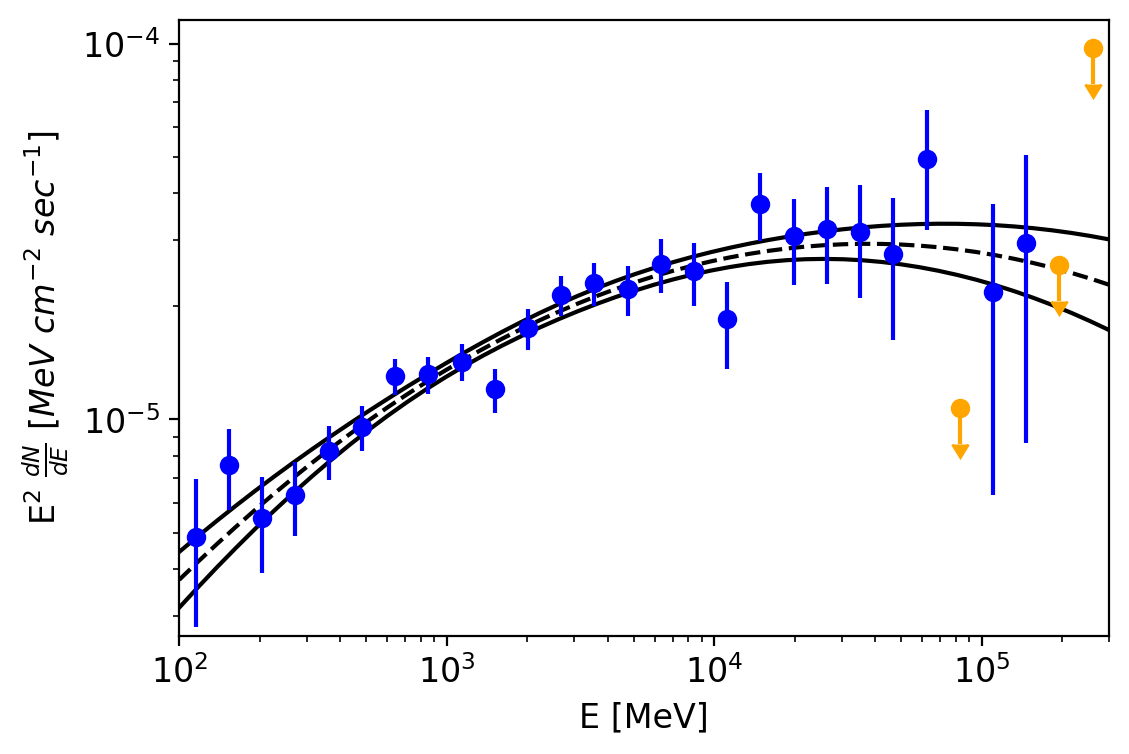

In [68]:
plt.figure(figsize=(6,4),dpi=200)
plt.plot(E,(E**2)*dnde, 'k--')
plt.plot(E,(E**2)*dnde_hi, 'k')
plt.plot(E,(E**2)*dnde_lo, 'k')
plt.yscale('log')
plt.xscale('log')
plt.errorbar(np.array(sed['e_ctr'][:-5]),
             np.array(sed['e2dnde'][:-5]),
             yerr = np.array(sed['e2dnde_err'][:-5]),
             fmt = 'o',color='b')
plt.errorbar(np.array(sed['e_ctr'][-4:-2]),
             np.array(sed['e2dnde'][-4:-2]),
             yerr = np.array(sed['e2dnde_err'][-4:-2]),
             fmt = 'o',color='b')

plt.errorbar(np.array(sed['e_ctr'][-2:]),
             np.array(sed['e2dnde_ul95'][-2:]),
             yerr = 0.2*np.array(sed['e2dnde_ul95'][-2:]),
             fmt = 'o',uplims=True,color='orange')
plt.errorbar(np.array(sed['e_ctr'][-5:-4]),
             np.array(sed['e2dnde_ul95'][-5:-4]),
             yerr = 0.2*np.array(sed['e2dnde_ul95'][-5:-4]),
             fmt = 'o',uplims=True,color='orange')

plt.xlim(100,300000)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2 \ \frac{dN}{dE} \ [MeV \ cm^{-2} \ sec^{-1}]$')
plt.show()

# <center> Lightcurve </center>

# <font face='Time New Roman' size=4>Generating a light curve is a time-consuming process. The total observation period is divided into smaller time bins, and a fit is performed for each bin to compute a flux point. This method helps investigate the source's temporal variability over time. If you aim to generate the light curve for the entire observation period of this source to date, this process typically takes around 10-12 hours, depending on the capabilities of the machine being used. </font> 

# <font face='Time New Roman'  size=4> Due to the time restriction, it would be not done during the time frame given for this tutorial. Therefore, we are going to generate the lightcurve between 2024-01-01 00:00:00 and 2024-11-01 00:00:00 (11 months)  </font> 

# <font face='Time New Roman'  size=4> Let's generate the lightcurve with a bin size of 30 days.  </font> 

In [39]:
binsize = 30
start_MET = 725760005
end_MET = 752112005
duration_days = (end_MET - start_MET)/(24*60*60) # 86400 secs
print('Observation days :', duration_days)
binslc = list(map(int, np.array(range(start_MET, end_MET, 30 * 86400))))
binslc
                  

Observation days : 305.0


[725760005,
 728352005,
 730944005,
 733536005,
 736128005,
 738720005,
 741312005,
 743904005,
 746496005,
 749088005,
 751680005]

# <font face='Time New Roman'  size=4> Perform the last task but not the least of this activity.  </font> 

In [70]:
lc = gta.lightcurve('4FGL J1555.7+1111',
                    free_params = ['alpha', 'beta'],
                    time_bins = binslc,
                    use_local_ltcube=True,
                    use_scaled_srcmap=True,
                    write_fits=True,
                    write_npy=True,
                    make_plots=True)



2024-11-21 10:39:53 INFO    GTAnalysis.lightcurve(): Computing Lightcurve for 4FGL J1555.7+1111
2024-11-21 10:39:56 INFO    lightcurve_725760005_728352005 GTAnalysis._process_lc_bin(): Fitting time range 725760005 728352005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:40:20 INFO    lightcurve_725760005_728352005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_725760005_728352005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    286.191
Fitting shape 4FGL J1608.7+1029 TS:     95.455
Fitting shape 4FGL J1548.3+1456 TS:     24.649
Drm_Cache::update Measured counts < 0 4FGL J1548.3+1456 27 -1.47674e-13 1.07778e-12
0.0518445 0.155177 0.376588 0.756829 1.29604 1.88115 2.32956 2.48116 2.28118 1.79976 1.20733 0.694685 0.344521 0.148615 0.056187 0.0189203 0.00553921 0.00141328 0.000315552 6.21953e-05 1.08717e-05 1.64755e-06 2.15602e-07 2.45814e-08 2.44935e-09 2.12864e-10 1.61945e-11 1.07778e-12 
Fitting shape 4FGL J1607.0+1550 TS:     22.470
Fitting shape 4FGL J1540.7+1449 TS:     18.758
Fitting shape 4FGL J1552.0+0850 TS:     18.577


2024-11-21 10:40:40 INFO    lightcurve_725760005_728352005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_725760005_728352005/fit_model_final_00.xml...
2024-11-21 10:40:42 INFO    lightcurve_725760005_728352005 GTAnalysis._process_lc_bin(): Finished time range 725760005 728352005
2024-11-21 10:40:44 INFO    lightcurve_728352005_730944005 GTAnalysis._process_lc_bin(): Fitting time range 728352005 730944005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:41:08 INFO    lightcurve_728352005_730944005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_728352005_730944005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    327.594
Fitting shape 4FGL J1608.7+1029 TS:     98.060
Fitting shape 4FGL J1548.3+1456 TS:     25.656
Fitting shape 4FGL J1546.0+0819 TS:     24.862
Fitting shape 4FGL J1540.7+1449 TS:     16.122


2024-11-21 10:41:26 INFO    lightcurve_728352005_730944005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_728352005_730944005/fit_model_final_00.xml...
2024-11-21 10:41:28 INFO    lightcurve_728352005_730944005 GTAnalysis._process_lc_bin(): Finished time range 728352005 730944005
2024-11-21 10:41:30 INFO    lightcurve_730944005_733536005 GTAnalysis._process_lc_bin(): Fitting time range 730944005 733536005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:41:54 INFO    lightcurve_730944005_733536005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_730944005_733536005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']


/opt/anaconda3/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1555.7+1111 TS:    401.502
Fitting shape 4FGL J1608.7+1029 TS:    160.345
Fitting shape 4FGL J1548.3+1456 TS:     72.106
Fitting shape 4FGL J1607.0+1550 TS:     21.804


2024-11-21 10:42:11 INFO    lightcurve_730944005_733536005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_730944005_733536005/fit_model_final_00.xml...
2024-11-21 10:42:13 INFO    lightcurve_730944005_733536005 GTAnalysis._process_lc_bin(): Finished time range 730944005 733536005
2024-11-21 10:42:15 INFO    lightcurve_733536005_736128005 GTAnalysis._process_lc_bin(): Fitting time range 733536005 736128005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:42:40 INFO    lightcurve_733536005_736128005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_733536005_736128005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1608.7+1029 TS:    201.122
Fitting shape 4FGL J1555.7+1111 TS:    195.268
Fitting shape 4FGL J1548.3+1456 TS:    124.566
Fitting shape 4FGL J1607.0+1550 TS:     18.213


2024-11-21 10:42:56 INFO    lightcurve_733536005_736128005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_733536005_736128005/fit_model_final_00.xml...
2024-11-21 10:42:58 INFO    lightcurve_733536005_736128005 GTAnalysis._process_lc_bin(): Finished time range 733536005 736128005
2024-11-21 10:43:00 INFO    lightcurve_736128005_738720005 GTAnalysis._process_lc_bin(): Fitting time range 736128005 738720005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:43:24 INFO    lightcurve_736128005_738720005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_736128005_738720005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    340.738
Fitting shape 4FGL J1548.3+1456 TS:    147.073
Fitting shape 4FGL J1608.7+1029 TS:     52.537
Fitting shape 4FGL J1607.0+1550 TS:     24.888
Fitting shape 4FGL J1552.0+0850 TS:     17.120


2024-11-21 10:43:42 INFO    lightcurve_736128005_738720005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_736128005_738720005/fit_model_final_00.xml...
2024-11-21 10:43:43 INFO    lightcurve_736128005_738720005 GTAnalysis._process_lc_bin(): Finished time range 736128005 738720005
2024-11-21 10:43:45 INFO    lightcurve_738720005_741312005 GTAnalysis._process_lc_bin(): Fitting time range 738720005 741312005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:44:10 INFO    lightcurve_738720005_741312005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_738720005_741312005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    342.164
Fitting shape 4FGL J1608.7+1029 TS:     92.567
Fitting shape 4FGL J1548.3+1456 TS:     80.308


2024-11-21 10:44:26 INFO    lightcurve_738720005_741312005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_738720005_741312005/fit_model_final_00.xml...
2024-11-21 10:44:28 INFO    lightcurve_738720005_741312005 GTAnalysis._process_lc_bin(): Finished time range 738720005 741312005
2024-11-21 10:44:30 INFO    lightcurve_741312005_743904005 GTAnalysis._process_lc_bin(): Fitting time range 741312005 743904005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:44:55 INFO    lightcurve_741312005_743904005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_741312005_743904005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    307.287
Fitting shape 4FGL J1548.3+1456 TS:    102.454
Fitting shape 4FGL J1608.7+1029 TS:     93.019
Fitting shape 4FGL J1540.7+1449 TS:     24.887


2024-11-21 10:45:11 INFO    lightcurve_741312005_743904005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_741312005_743904005/fit_model_final_00.xml...
2024-11-21 10:45:13 INFO    lightcurve_741312005_743904005 GTAnalysis._process_lc_bin(): Finished time range 741312005 743904005
2024-11-21 10:45:15 INFO    lightcurve_743904005_746496005 GTAnalysis._process_lc_bin(): Fitting time range 743904005 746496005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:45:40 INFO    lightcurve_743904005_746496005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_743904005_746496005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    420.953
Fitting shape 4FGL J1548.3+1456 TS:     88.431
Fitting shape 4FGL J1608.7+1029 TS:     44.044
Fitting shape 4FGL J1540.7+1449 TS:     29.230
Fitting shape 4FGL J1607.0+1550 TS:     27.454


2024-11-21 10:45:57 INFO    lightcurve_743904005_746496005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_743904005_746496005/fit_model_final_00.xml...
2024-11-21 10:45:59 INFO    lightcurve_743904005_746496005 GTAnalysis._process_lc_bin(): Finished time range 743904005 746496005
2024-11-21 10:46:01 INFO    lightcurve_746496005_749088005 GTAnalysis._process_lc_bin(): Fitting time range 746496005 749088005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:46:27 INFO    lightcurve_746496005_749088005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_746496005_749088005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    557.545
Fitting shape 4FGL J1608.7+1029 TS:    101.414
Fitting shape 4FGL J1548.3+1456 TS:     30.224


2024-11-21 10:46:42 INFO    lightcurve_746496005_749088005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_746496005_749088005/fit_model_final_00.xml...
2024-11-21 10:46:44 INFO    lightcurve_746496005_749088005 GTAnalysis._process_lc_bin(): Finished time range 746496005 749088005
2024-11-21 10:46:46 INFO    lightcurve_749088005_751680005 GTAnalysis._process_lc_bin(): Fitting time range 749088005 751680005
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2024-11-21 10:47:13 INFO    lightcurve_749088005_751680005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_749088005_751680005/base_00.xml...


Joint fit  ['4FGL J1608.7+1029', '4FGL J1555.7+1111', '4FGL J1548.3+1456', '4FGL J1607.0+1550']
Fitting shape 4FGL J1555.7+1111 TS:    642.571
Fitting shape 4FGL J1608.7+1029 TS:    295.579
Fitting shape 4FGL J1548.3+1456 TS:     52.273
Fitting shape 4FGL J1553.6+1257 TS:     19.182


2024-11-21 10:47:31 INFO    lightcurve_749088005_751680005 GTBinnedAnalysis.write_xml(): Writing /Volumes/Seagate/MAC-BOOK/PhD-PROJECTS/Talks/BHU_HEAW2024_hands_on/lightcurve_749088005_751680005/fit_model_final_00.xml...
2024-11-21 10:47:33 INFO    lightcurve_749088005_751680005 GTAnalysis._process_lc_bin(): Finished time range 749088005 751680005
2024-11-21 10:47:37 INFO    GTAnalysis.lightcurve(): Finished Lightcurve


# <font face='Time New Roman'  size=4> Read the lightcurve data file  </font> 

In [38]:
# Load the generated lightcurve data file and extract quantites
LC = np.load('4fgl_j1555.7+1111_lightcurve.npy', allow_pickle=True).flat[0]

MJD = (LC['tmin_mjd'] + LC['tmax_mjd']) / 2.      # Time
flux = LC['flux']                                 # Flux
flux_err = LC['flux_err']                         # Flux error
binsize = (LC['tmax_mjd'] - LC['tmin_mjd']) / 2.  # Binsize
alpha = LC['param_values'][:,1]                   # alpha parameter
beta = LC['param_values'][:,2]                    # beta parameter
alpha_err = LC['param_errors'][:,1]               # Error on alpha parameter 
beta_err = LC['param_errors'][:,2]                # Error on beta parameter  


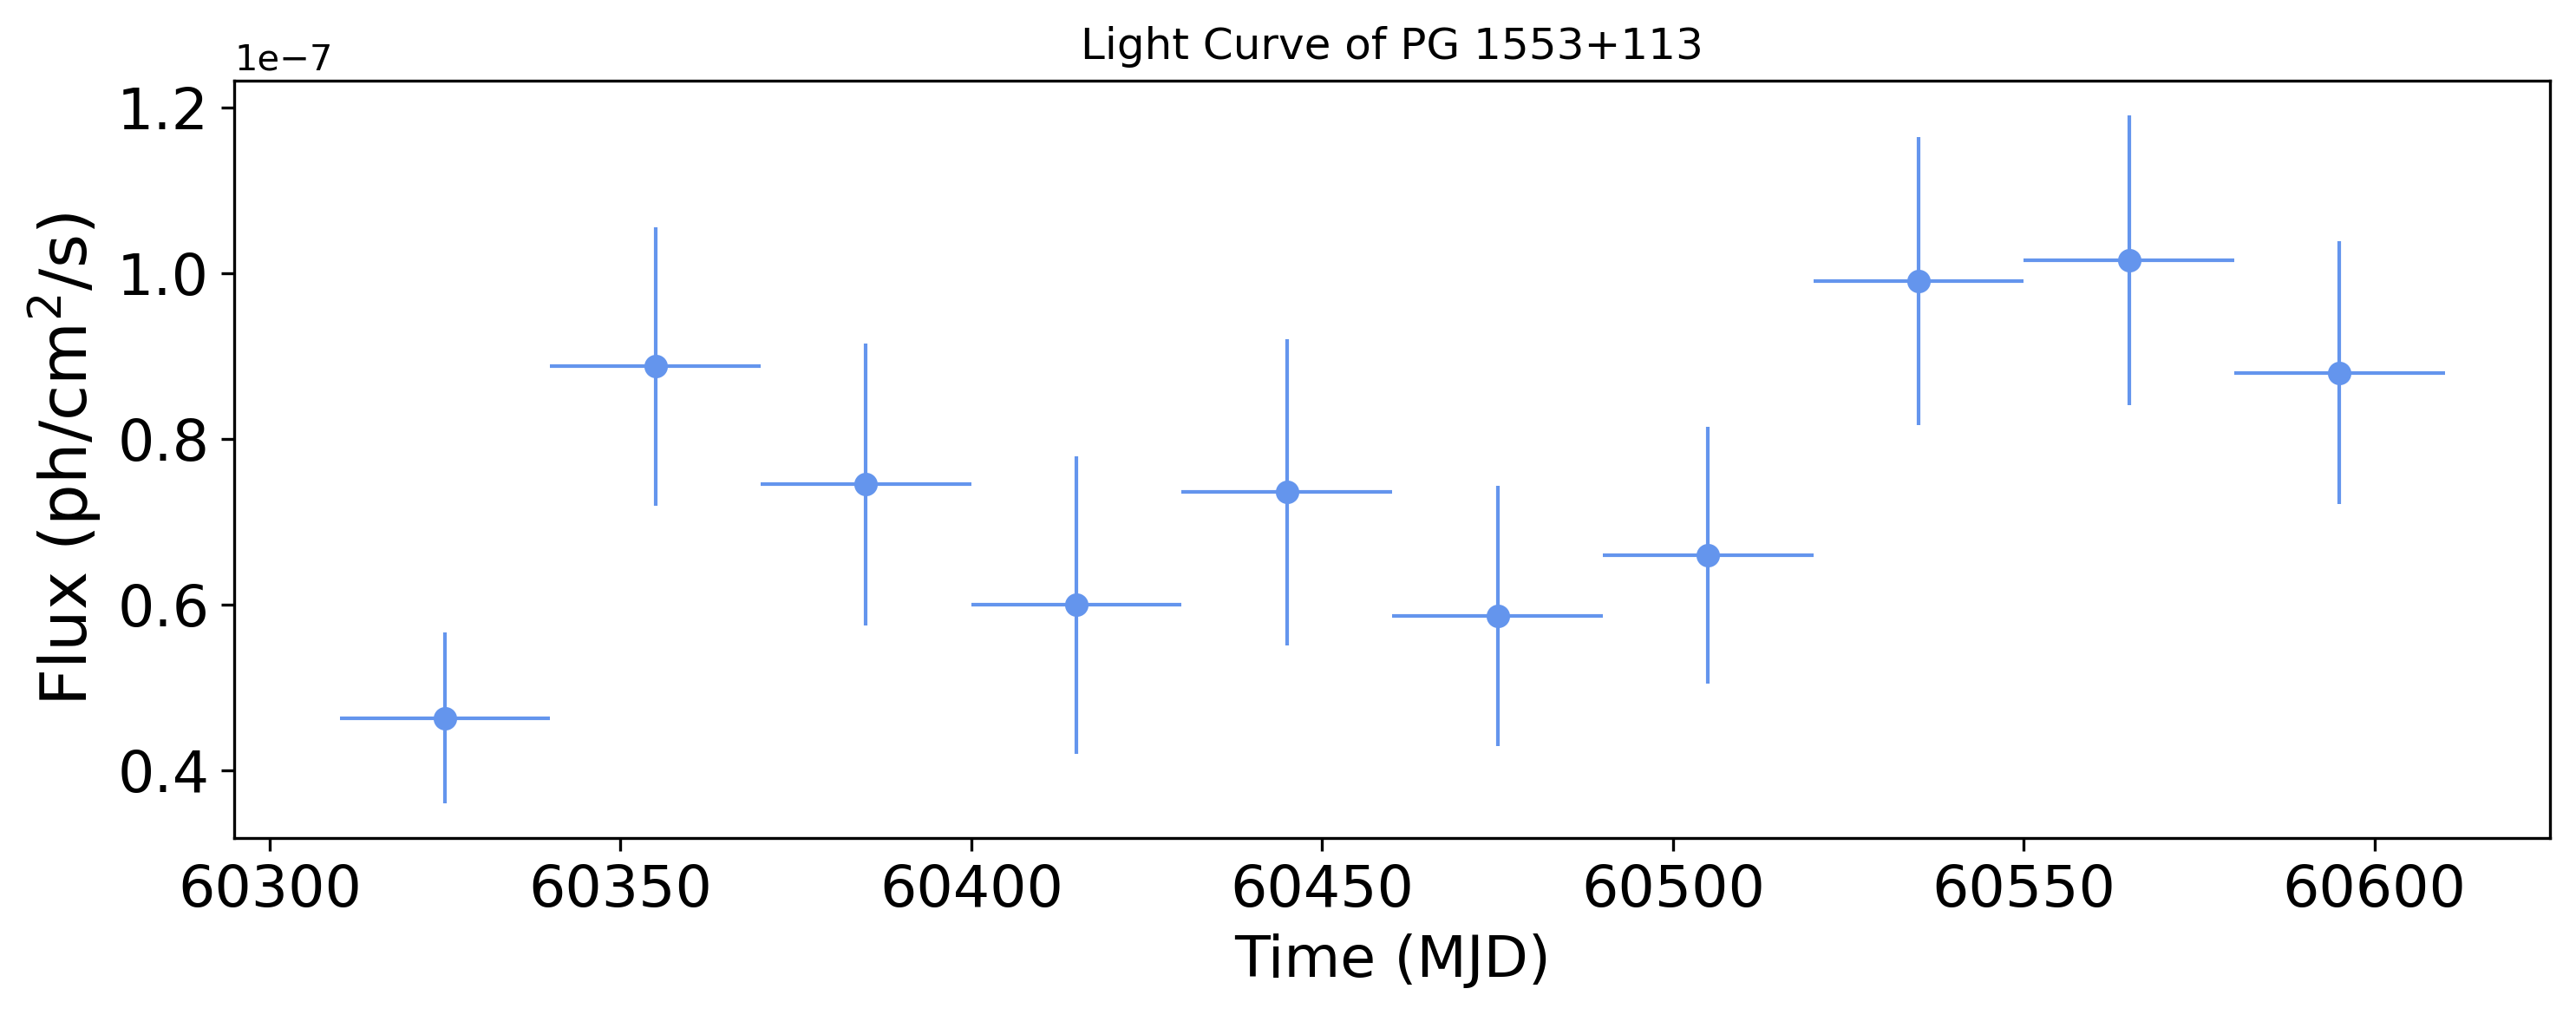

In [35]:
fig = plt.figure(figsize=(10, 4), dpi=300)
plt.errorbar(MJD,
             flux,
             yerr=flux_err,
             xerr=binsize,
             fmt='o',
             color="cornflowerblue",
             markersize=6,
             markeredgecolor='cornflowerblue',
             markeredgewidth=0.5,  # Adjust marker edge width here
             ecolor='cornflowerblue',
             elinewidth=1)

plt.ylabel(r'Flux (ph/cm$^2$/s)', fontsize=18)
plt.xlabel(r'Time (MJD)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Light Curve of PG 1553+113')
#plt.xlim(58000,60000)
plt.tight_layout()
plt.show()

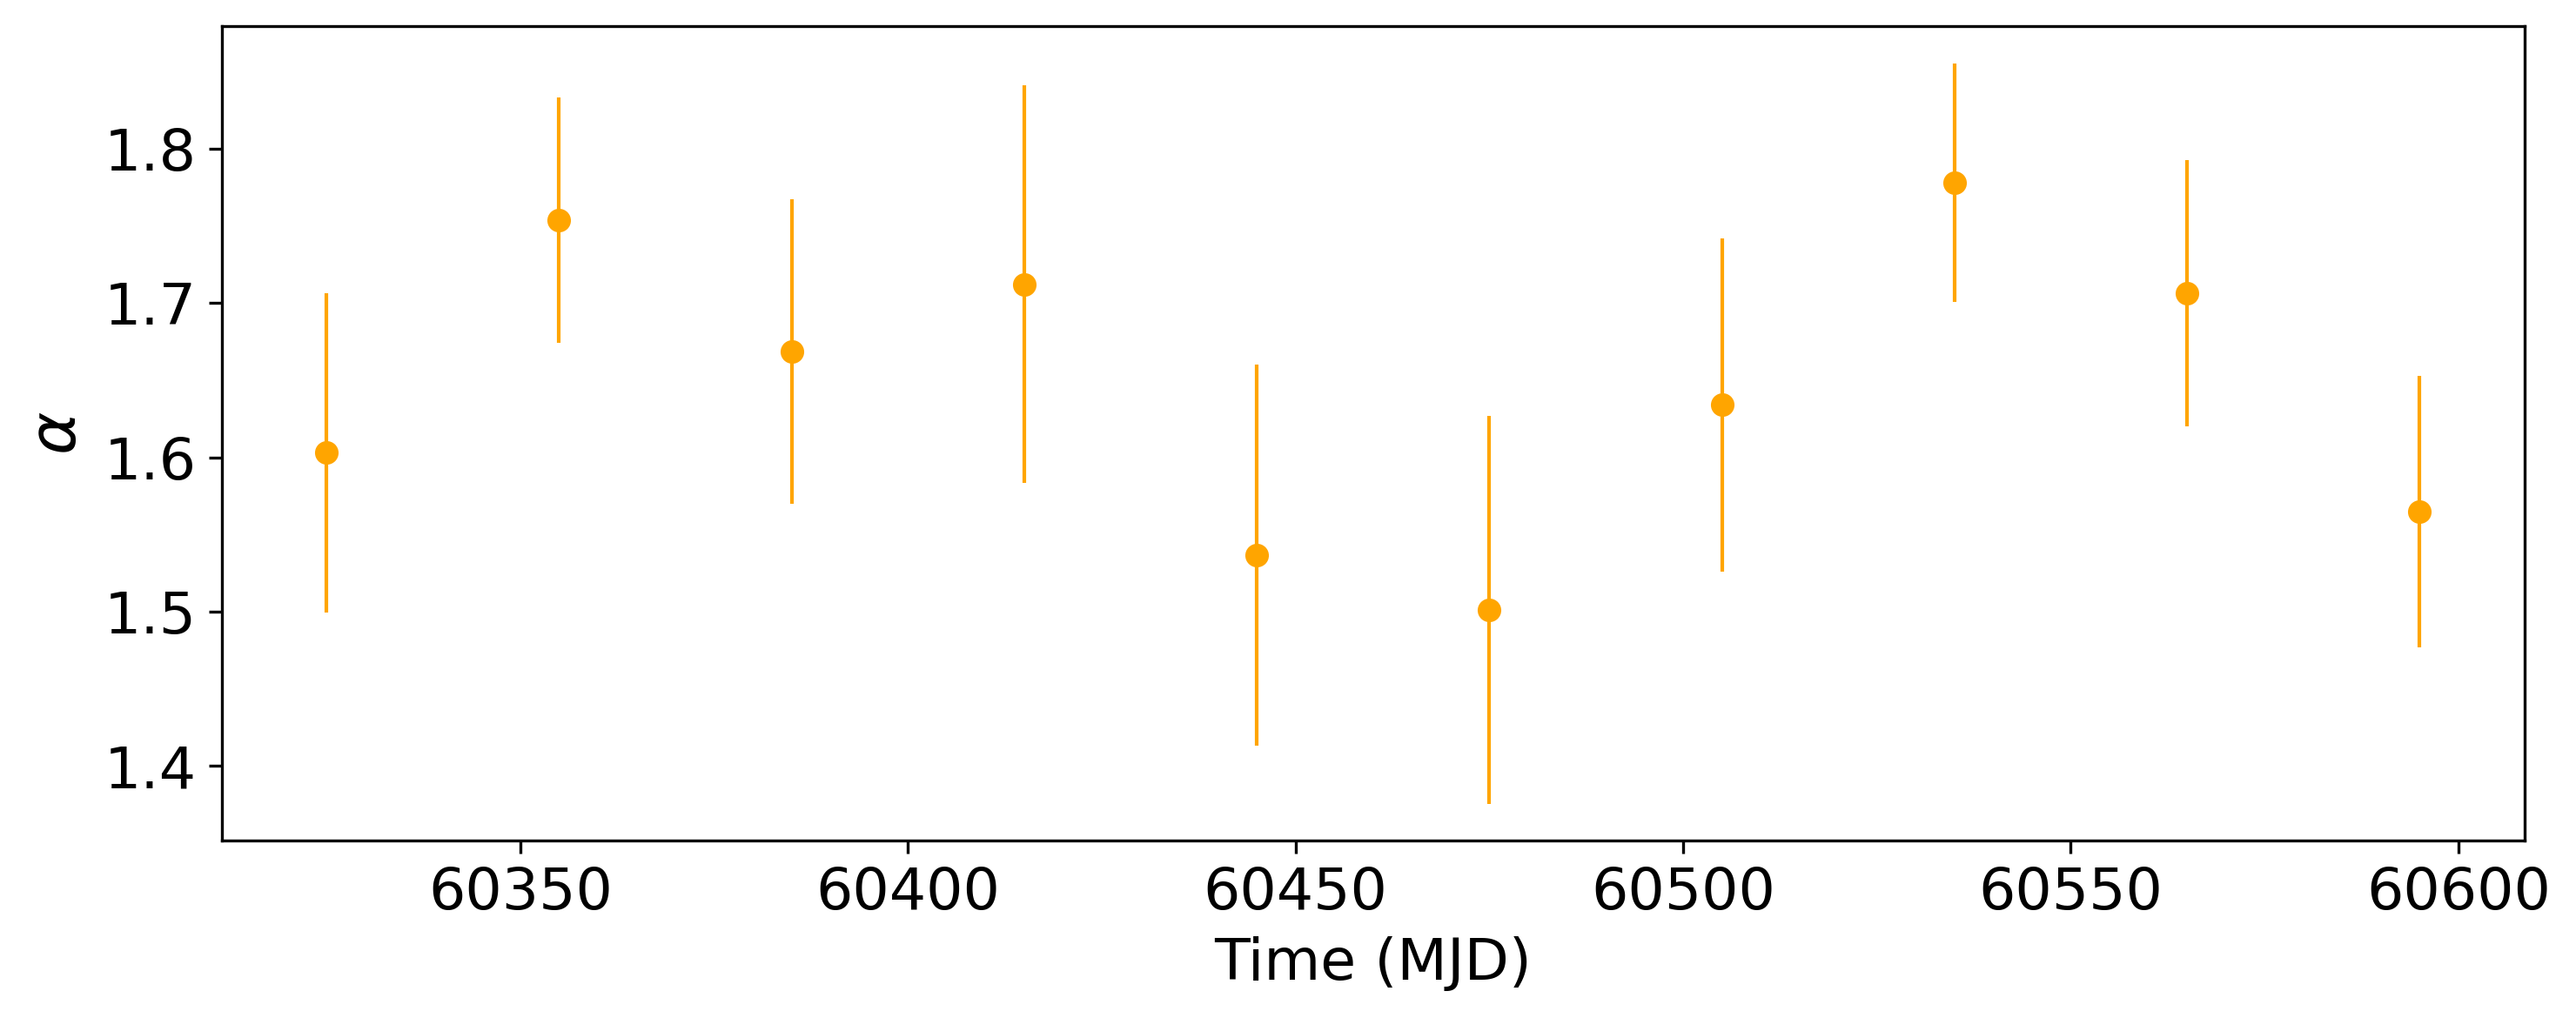

In [36]:
fig = plt.figure(figsize=(10, 4), dpi=300)
plt.errorbar(MJD,
             alpha,
             yerr=alpha_err,
             fmt='o',
             color="orange",
             markersize=6,
             markeredgecolor='orange',
             markeredgewidth=0.5,  # Adjust marker edge width here
             ecolor='orange',
             elinewidth=1 )

plt.ylabel(r'$\alpha$', fontsize=18)
plt.xlabel(r'Time (MJD)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

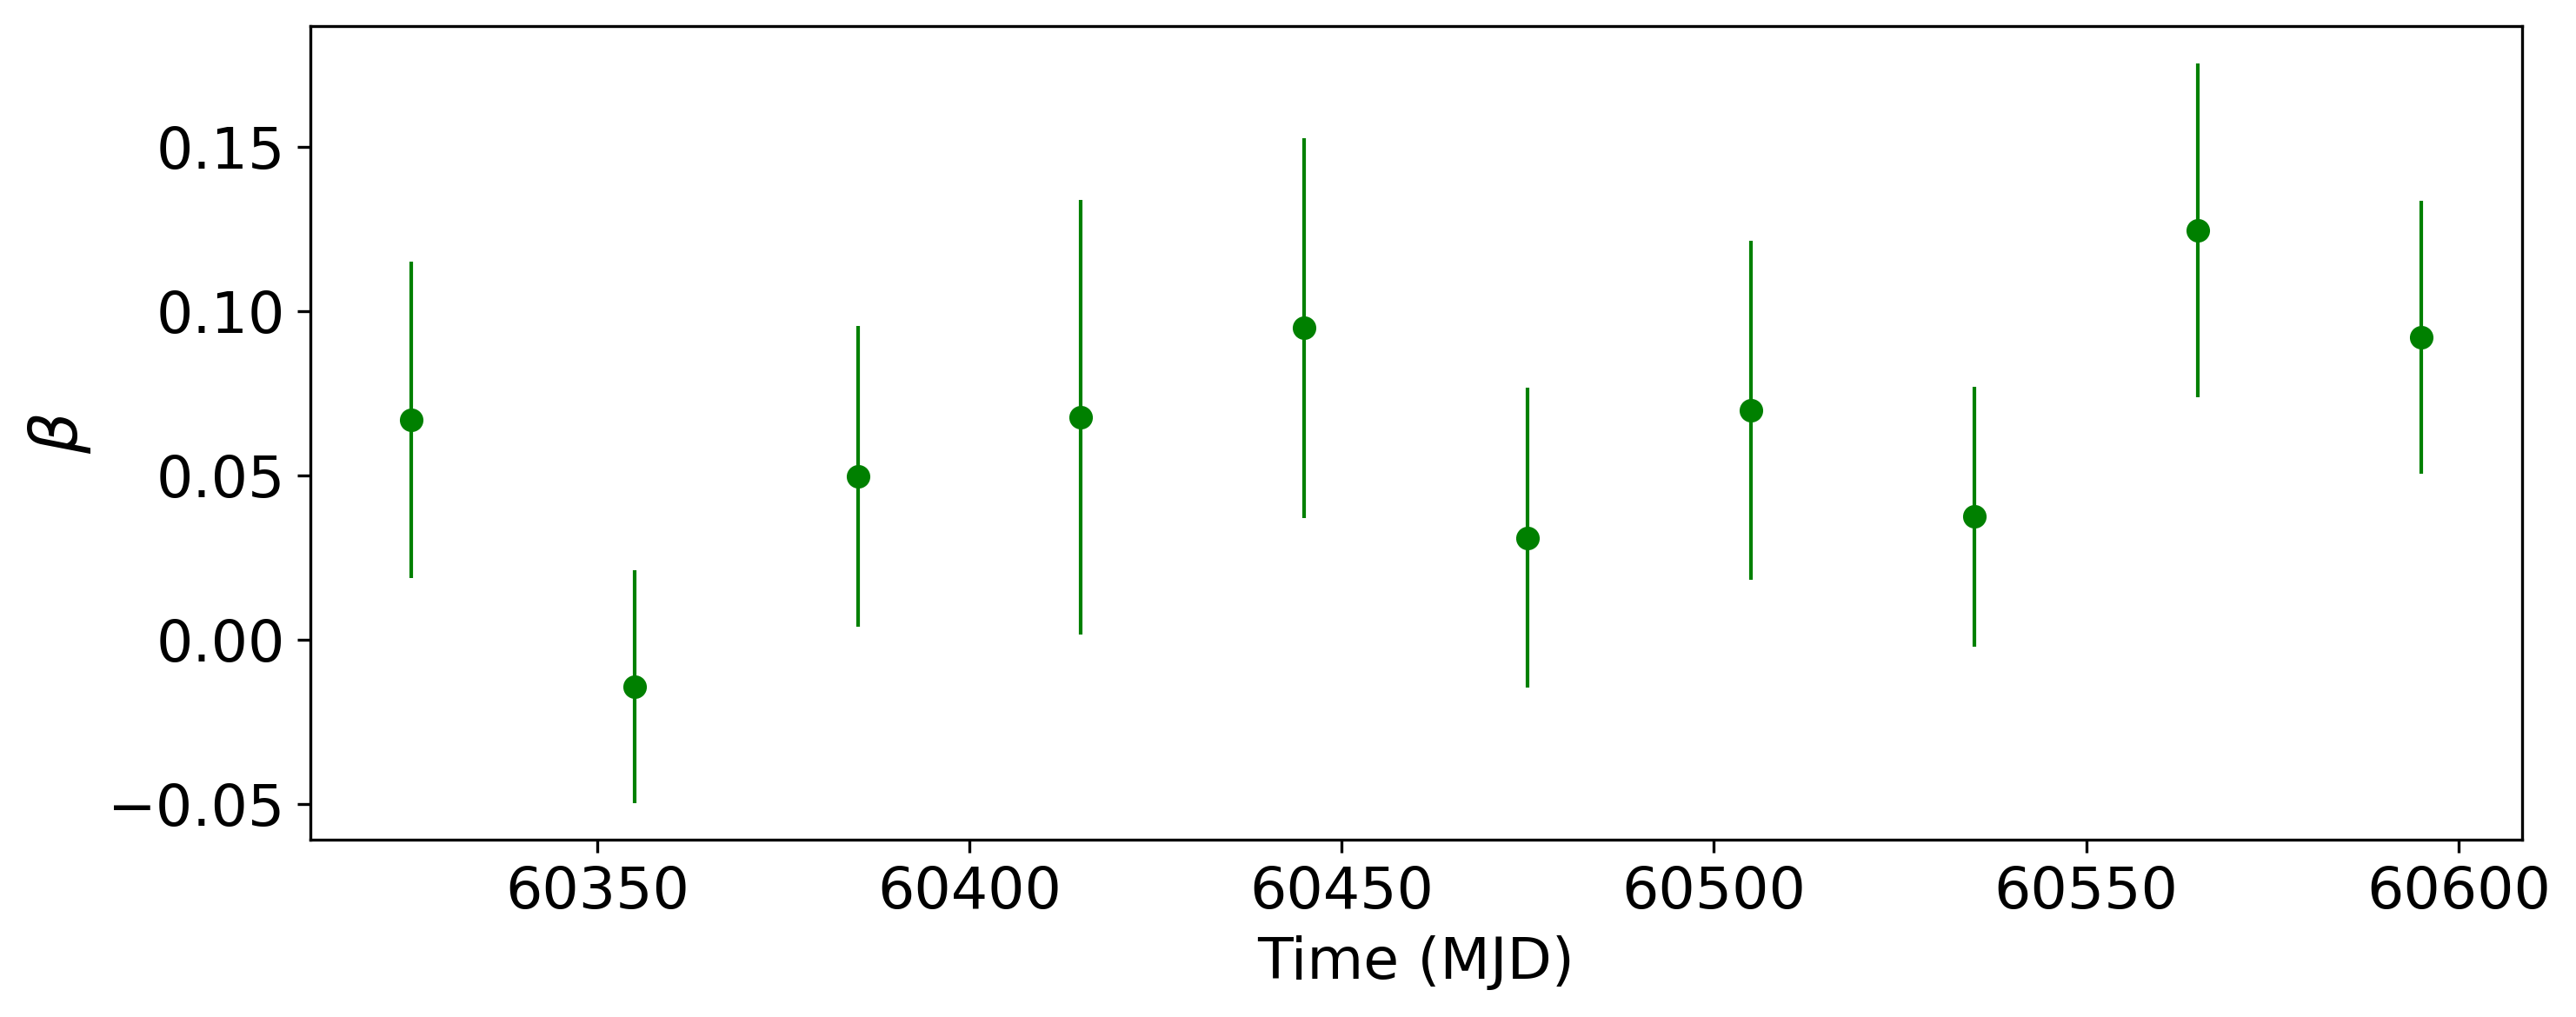

In [37]:
fig = plt.figure(figsize=(10, 4), dpi=300)
plt.errorbar(MJD,
             beta,
             yerr=beta_err,
             fmt='o',
             color="green",
             markersize=6,
             markeredgecolor='green',
             markeredgewidth=0.5,  # Adjust marker edge width here
             ecolor='green',
             elinewidth=1 )

plt.ylabel(r'$\beta$', fontsize=18)
plt.xlabel(r'Time (MJD)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# # <font face='Time New Roman'> Other tools are also available for analyzing Fermi-LAT data. </font>
- <font face='Time New Roman' size=5> Easyfermi </font>
- <font face='Time New Roman' size=5> Enrico </font>
### <font face='Time New Roman'> Fermipy is a popular tool among them.</font>


# <center> <font color='magenta'> Thank you all </font></center>